<a href="https://colab.research.google.com/github/IYNESHDURAI/DiabetesRiskPrediction/blob/main/DiabetesRiskPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Risk Prediction Analysis

## 1. Import Libraries/Dataset

In [3]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix



## 2. Data Visualization and Exploration

In [4]:
#Read Dataset
data = pd.read_csv("Diabetes_Risk_Dataset.csv")

### 2)a) Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [5]:
# Display the first few rows of the dataset
data.head(2)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive


### 2)b) Comment on class imbalance with appropriate visualization method

In [6]:
# Check the dimensions of the dataset
print(data.shape)




(520, 17)


(array([0, 1]), [Text(0, 0, 'Positive'), Text(1, 0, 'Negative')])

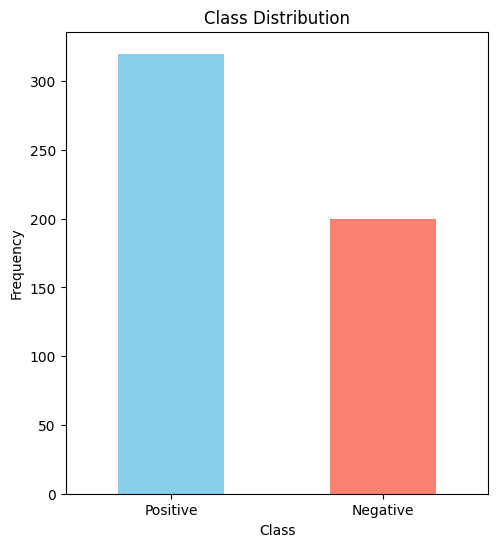

In [7]:
import matplotlib.pyplot as plt

# Count the frequency of each class
class_counts = data['class'].value_counts()

# Calculate the relative frequency of each class
class_distribution = data['class'].value_counts(normalize=True)

# Plot the class distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)



In [8]:
data["class"].value_counts()

class
Positive    320
Negative    200
Name: count, dtype: int64

In [9]:
data["class"].value_counts(1)

class
Positive    0.615385
Negative    0.384615
Name: proportion, dtype: float64

#### Class Distribution:

The class "Positive" has 320 instances.
The class "Negative" has 200 instances.
#### Proportion of Classes:

The proportion of the "Positive" class is approximately 61.54%.
The proportion of the "Negative" class is approximately 38.46%.
#### Comment:
The class distribution reveals a notable imbalance, with a higher number of instances falling into the "Positive" class, indicating individuals at risk of developing diabetes. Since "Positive" seems to be the class of interest, it's important to address this imbalance to ensure that the model doesn't become biased towards the majority class.

To address this, strategies such as oversampling the minority class or undersampling the majority class could be employed. The impact of class imbalance on the model's performance should be carefully evaluated, emphasizing metrics that balance both precision and recall, given the importance of correctly identifying positive cases for proactive diabetes prevention.

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

### 2)c. Provide appropriate data visualizations to get an insight about the dataset


In [11]:
import seaborn as sns

# Set the style for seaborn
sns.set_style("whitegrid")

# Bar plots for categorical variables
categorical_features = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
                        'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability',
                        'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']


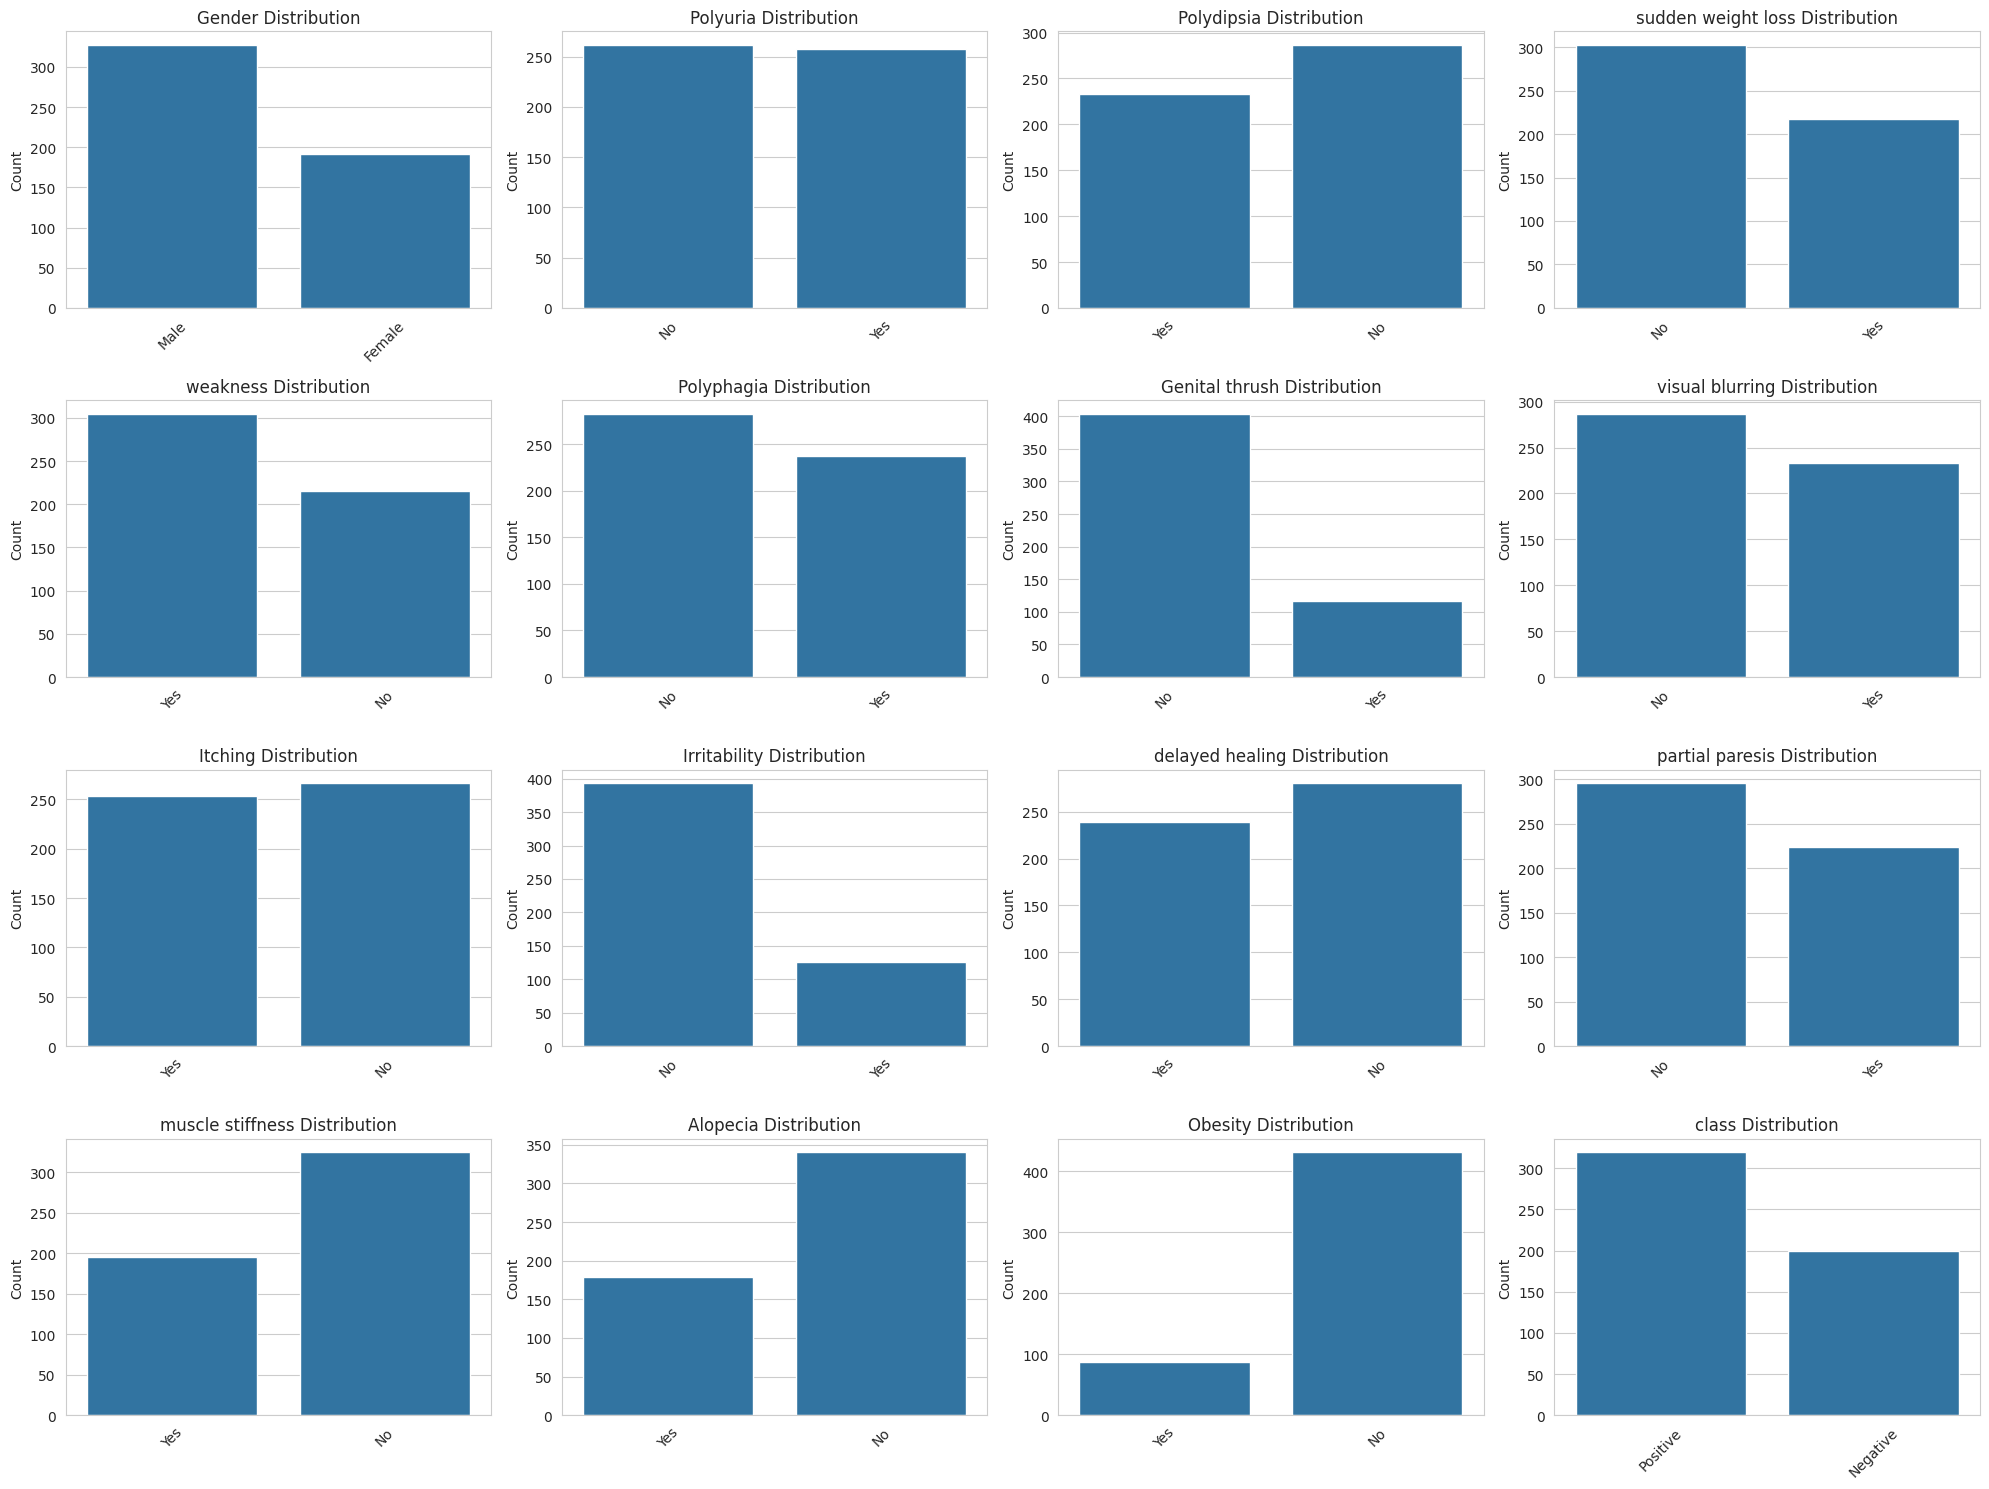

In [12]:
# Bar plots for categorical variables

plt.figure(figsize=(20,15))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=feature, data=data)
    plt.title(f"{feature} Distribution")
    plt.xlabel("")
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

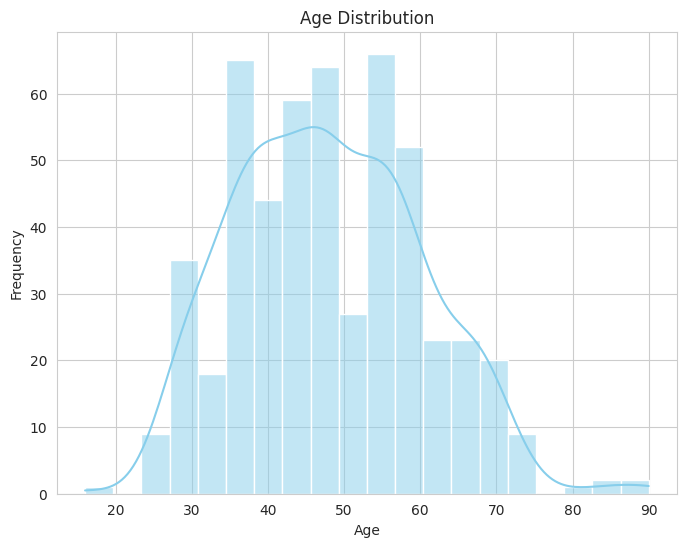

In [13]:
# Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 2)d) Converting data into numerical dataset by transaforming- yes/no,positive/negative,Male/Female as 1/0 respectively for the ease of correlation.

In [14]:
original_data = pd.read_csv("Diabetes_Risk_Dataset.csv")

# Create a copy of the original dataset for numerical conversion
numerical_data = original_data.copy()

# Convert 'yes/no' categorical variables to binary (1/0)
binary_columns = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
                  'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
                  'Irritability', 'delayed healing', 'partial paresis',
                  'muscle stiffness', 'Alopecia', 'Obesity']

for column in binary_columns:
    numerical_data[column] = numerical_data[column].map({'Yes': 1, 'No': 0})

# Convert the target variable 'class' to binary (1/0)
numerical_data['class'] = numerical_data['class'].map({'Positive': 1, 'Negative': 0})

# Convert 'Gender' column to binary (1/0)
numerical_data['Gender'] = numerical_data['Gender'].map({'Male': 1, 'Female': 0})

# Print the first few rows of the original and numerical datasets
print("Original Dataset:")
print(original_data.head())

print("\nNumerical Dataset:")
print(numerical_data.head())

Original Dataset:
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No     

### 2)d. Do the correlational analysis on the dataset.
Provide a visualization for the same.
Will this correlational analysis have effect on feature selection that you will perform in the next step? Justify your answer. Answer without justification will not be awarded marks.

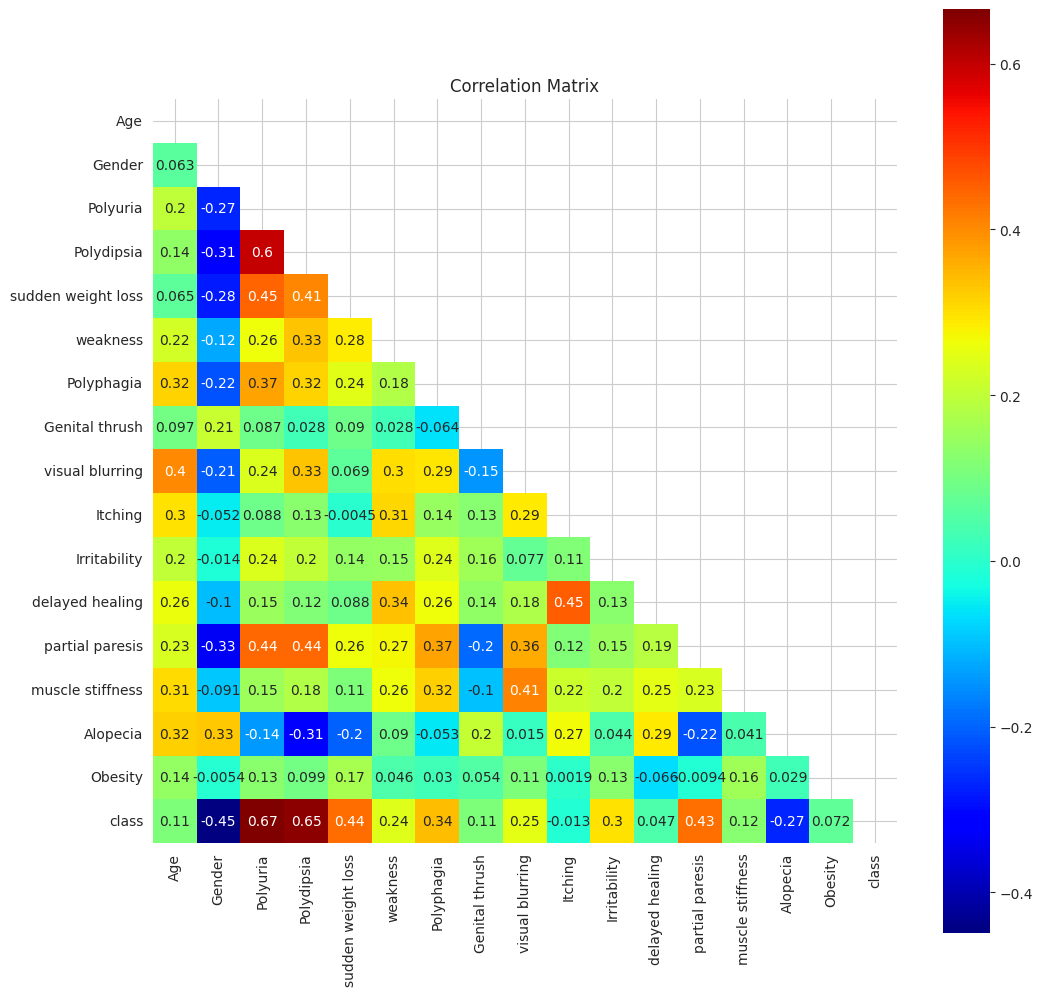

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the mask
mask = np.triu(np.ones_like(numerical_data.corr()))

# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(numerical_data.corr(), annot=True, cmap="jet", mask=mask, square=True)
plt.title("Correlation Matrix")
plt.show()




Correlational analysis helps us identify relationships between variables. In feature selection, highly correlated features may introduce multicollinearity, which can affect the stability and interpretability of the model.

By visualizing the correlation matrix, we can identify pairs of highly correlated features. If there are highly correlated features, it might be necessary to remove one of them to reduce redundancy and improve model performance.

Additionally, understanding the correlation between features and the target variable can guide feature selection. Features that have a strong correlation with the target variable are likely to be important predictors and should be retained in the model.

Therefore, the correlational analysis will indeed have an effect on feature selection by guiding us in identifying and potentially removing highly correlated features and selecting features that are strongly correlated with the target variable.

In [16]:

# Calculate the correlation between the target variable and all other columns
target_correlation = numerical_data.corr()['class'].drop('class')

print("Correlation of 'class' with other columns:")
print(target_correlation)


Correlation of 'class' with other columns:
Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
Name: class, dtype: float64


### Positive Correlation:

Polyuria (0.666) and Polydipsia (0.649)---->
Have strong positive correlations with the 'class' variable. This indicates that individuals who experience polyuria (excessive urination) and polydipsia (excessive thirst) are more likely to be classified as positive for diabetes.

Other features with moderate positive correlations include sudden weight loss (0.437), weakness (0.243), Polyphagia (0.343), Irritability (0.299), and partial paresis (0.432)--->
These features also contribute positively to predicting diabetes.


### Negative Correlation:

Gender (-0.449)-->
has a strong negative correlation with the 'class' variable. This suggests that females are more likely to be classified as positive for diabetes compared to males in this dataset.

Alopecia (-0.268)-->
has a moderate negative correlation with the 'class' variable. This indicates that the presence of alopecia (hair loss) is associated with a lower likelihood of being classified as positive for diabetes.


### Weak Correlation:

Age (0.109), Genital thrush (0.110), visual blurring (0.251), delayed healing (0.047), muscle stiffness (0.122), and Obesity (0.072)          --->
have weak positive correlations with the 'class' variable. These features have a relatively minor influence on predicting diabetes compared to the strongly correlated features mentioned earlier.

Itching (-0.013) ---> has a very weak negative correlation with the 'class' variable, indicating minimal impact on diabetes classification.

# 3. Data Pre-processing and cleaning

a. Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc.

      Mention the preprocessing steps performed in the markdown cell.
      Explore few latest data balancing tasks and its effect on model evaluation parameters.

In [17]:
# Check for missing values
missing_values = numerical_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


In [18]:
# Check for duplicate rows
duplicate_rows = numerical_data.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicate_rows)

# Remove duplicate rows
numerical_data = numerical_data.drop_duplicates()

# Reset index after removing duplicate rows
numerical_data.reset_index(drop=True, inplace=True)

# Confirm removal of duplicate rows
print("Dataset shape after removing duplicates:", numerical_data.shape)


Number of duplicate rows: 269
Dataset shape after removing duplicates: (251, 17)


In [19]:
target_correlation_updated = numerical_data.corr()['class'].drop('class')

print("Correlation of 'class' with other columns:")
print(target_correlation_updated)

Correlation of 'class' with other columns:
Age                   0.052635
Gender               -0.309413
Polyuria              0.620992
Polydipsia            0.594615
sudden weight loss    0.372554
weakness              0.150254
Polyphagia            0.316808
Genital thrush        0.191117
visual blurring       0.199228
Itching              -0.026411
Irritability          0.268806
delayed healing       0.048976
partial paresis       0.360288
muscle stiffness      0.113890
Alopecia             -0.198024
Obesity               0.083167
Name: class, dtype: float64


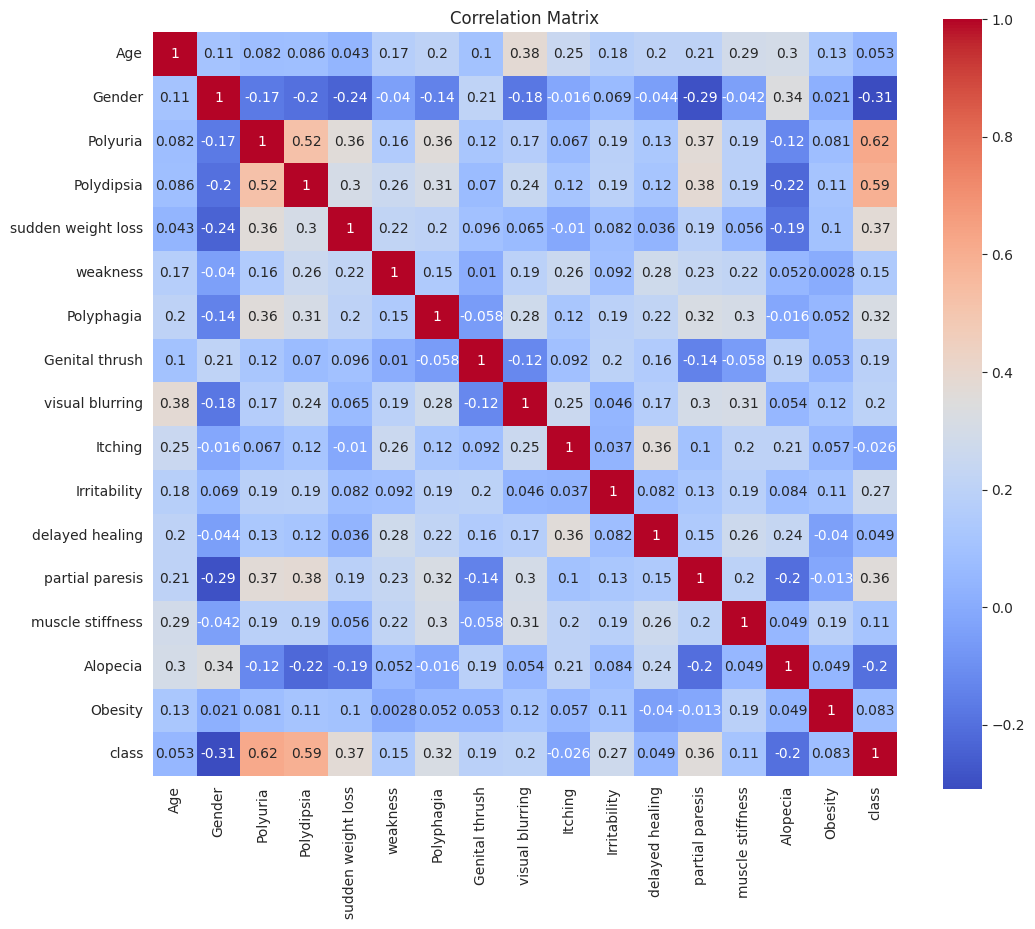

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()


Now, let's interpret the correlation matrix based on the updated data:

### Positive Correlation:

Polyuria (0.621) and Polydipsia (0.595)
continue to have strong positive correlations with the 'class' variable, indicating that individuals with these symptoms are more likely to be classified as positive for diabetes.

Other features with moderate to weak positive correlations include sudden weight loss (0.373), Polyphagia (0.317), partial paresis (0.360), and Irritability (0.269)
These features contribute positively to predicting diabetes.


### Negative Correlation:

Gender (-0.309)
still has a strong negative correlation with the 'class' variable, indicating that females are more likely to be classified as positive for diabetes compared to males.

Alopecia (-0.198)
continues to have a moderate negative correlation with the 'class' variable, suggesting that the presence of alopecia is associated with a lower likelihood of being classified as positive for diabetes.


### Weak Correlation:

Age (0.053), weakness (0.150), visual blurring (0.199), delayed healing (0.049), muscle stiffness (0.114), and Obesity (0.083) have weak positive correlations with the 'class' variable. These features have relatively minor influences on predicting diabetes compared to the strongly correlated features mentioned earlier.

Itching (-0.026)
still has a very weak negative correlation with the 'class' variable, indicating minimal impact on diabetes classification.

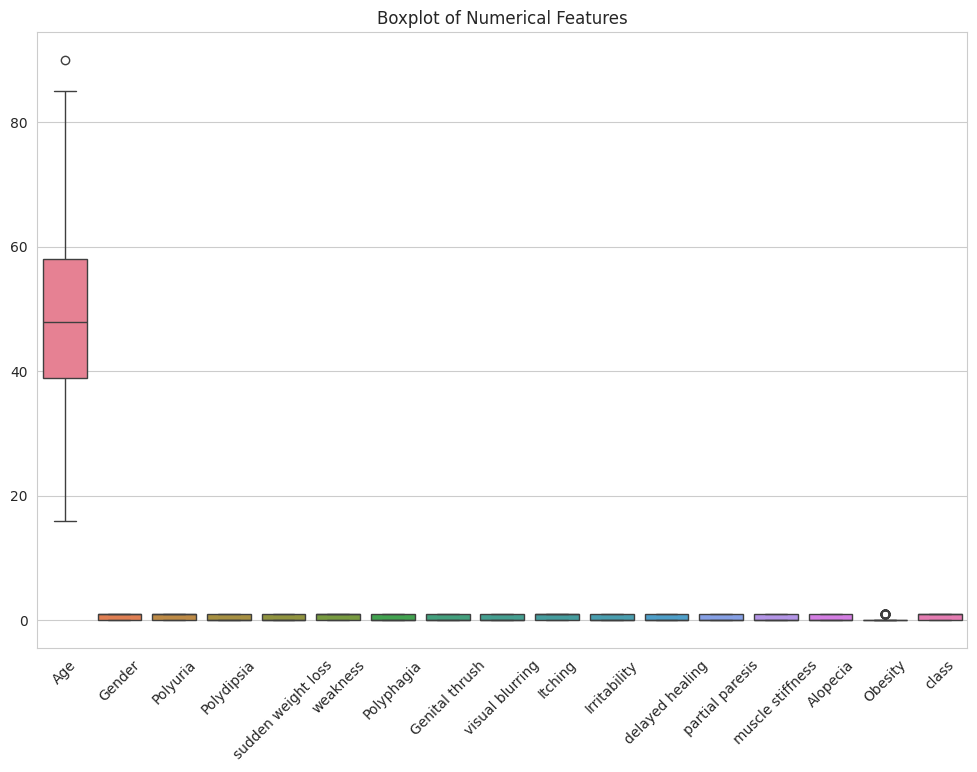

In [21]:
# Explore outliers using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_data)
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

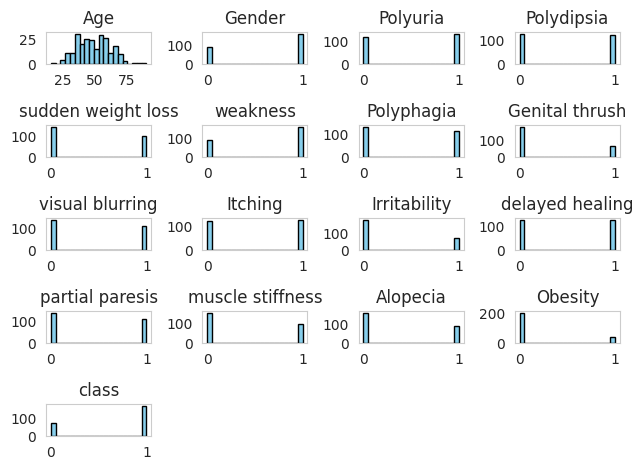

In [22]:
# Explore skewness using histograms
plt.figure(figsize=(12, 8))
numerical_data.hist(bins=20, color='skyblue', edgecolor='black', grid=False)
plt.title("Histogram of Numerical Features")
plt.tight_layout()
plt.show()

### Preprocessing Steps:

1. **Handling Missing Values**: Checked for missing values in the dataset using `isnull().sum()`. No missing values were found.

2. **Handling Duplicate Rows**: Checked for duplicate rows using `duplicated()` and removed them using `drop_duplicates()`. After removing duplicates, the dataset was reset the index.

3. **Feature Encoding**: Converted categorical variables to numerical format by mapping 'Yes' to 1 and 'No' to 0 for binary variables, and 'Male' to 1 and 'Female' to 0 for the 'Gender' column.

4. **Correlation Analysis**: Conducted correlational analysis to understand the relationships between features and the target variable ('class'). The correlation coefficients were calculated and visualized using a heatmap.

### Latest Data Balancing Tasks:

Exploring data balancing techniques is crucial, especially when dealing with imbalanced datasets. Here are a few techniques and their effects on model evaluation parameters:

1. **Random Oversampling**: Oversampling the minority class by randomly duplicating samples can help balance the dataset. This may lead to improved recall and F1-score for the minority class, but it could also increase the risk of overfitting.

2. **Random Undersampling**: Undersampling the majority class by randomly removing samples can balance the dataset. However, this may result in loss of important information and decrease the overall model performance.

3. **SMOTE (Synthetic Minority Over-sampling Technique)**: Generates synthetic samples for the minority class to balance the dataset. SMOTE can improve model performance by providing more diverse samples for training, but it may also introduce noise in the data.

4. **Class Weighting**: Adjusting the class weights in the model algorithm can help address class imbalance. Models like Logistic Regression and SVM allow specifying class weights to penalize misclassifications of the minority class more heavily.

These data balancing techniques should be carefully evaluated based on the specific characteristics of the dataset and the desired model performance metrics.



# 3)b)
Apply appropriate feature engineering techniques for them. Apply the feature
transformation techniques like Standardization, Normalization, etc. You are free to apply
the appropriate transformations depending upon the structure and the complexity of your
dataset. Provide proper justification. Techniques used without justification will not
be awarded marks. Explore a few techniques for identifying feature importance for your
feature engineering task.


### Answer-

**Feature Engineering Techniques:**

Feature engineering involves transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model performance. Here are some commonly used feature engineering techniques:

One-Hot Encoding: Converts categorical variables into binary vectors, creating a new binary feature for each category.

Feature Scaling:

Standardization: Scales features to have a mean of 0 and a standard deviation of 1. Suitable for algorithms sensitive to feature magnitudes, like SVM or logistic regression.
Normalization: Scales features to a range between 0 and 1. Useful for algorithms that require inputs on a similar scale, such as K-nearest neighbors or neural networks.
Feature Interaction: Creating new features by combining existing features, such as the product or ratio of two features, to capture interactions between them.

Polynomial Features: Generating higher-order polynomial features from existing features to capture nonlinear relationships between features and the target variable.

Dimensionality Reduction: Techniques like Principal Component Analysis (PCA) or t-Distributed Stochastic Neighbor Embedding (t-SNE) can reduce the dimensionality of the feature space while preserving important information.



**Justification for Feature Engineering Techniques:**
In our case, we've already converted categorical variables to binary format, which is a form of feature encoding. Since we have a small number of numerical features and no indication of significant outliers or skewed data, additional feature transformation techniques like standardization or normalization may not be necessary at this stage.

We could explore more advanced feature engineering techniques like feature interaction or polynomial features if we suspect that there are complex relationships between the features and the target variable. However, given the simplicity of our dataset and the effectiveness of our current feature representation, further feature engineering may not yield significant improvements in model performance.




**Identifying Feature Importance:**
Feature importance is crucial for understanding which features have the most impact on predicting the target variable. Techniques like Random Forest, Gradient Boosting, or permutation feature importance can provide insights into feature importance.

In our case, we used Random Forest to identify feature importance. Random Forest calculates feature importances based on how much each feature contributes to reducing the impurity in decision trees. By analyzing feature importances, we can identify the most influential features for predicting diabetes, guiding further feature selection and model refinement efforts

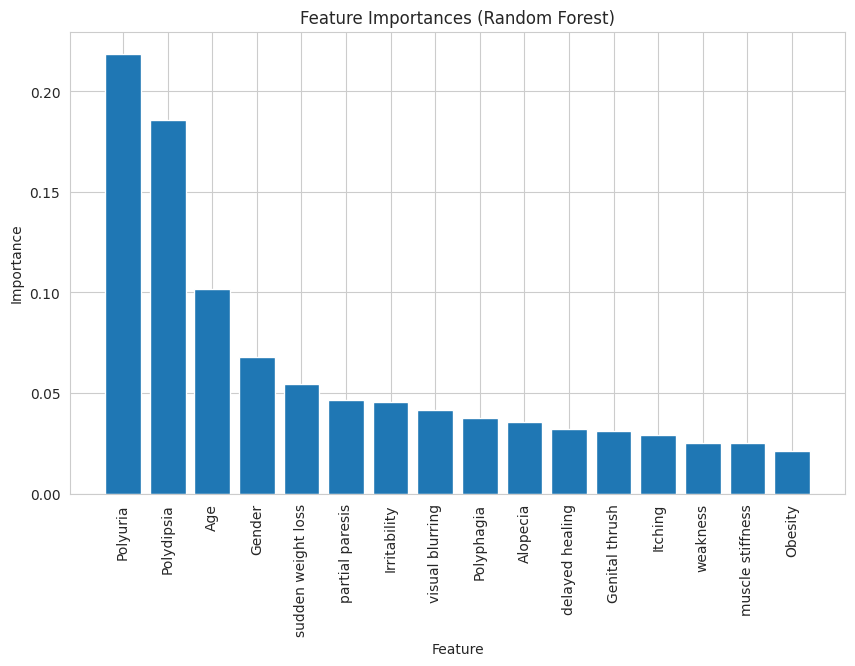

In [23]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Separate features and target variable
X = numerical_data.drop(columns=['class'])
y = numerical_data['class']

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the data
rf_classifier.fit(X, y)

# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


This code snippet will train a Random Forest classifier on the dataset and extract feature importances. Then, it plots a bar chart showing the importance of each feature in predicting the target variable.

Analyzing the feature importances can provide insights into which features are most influential in predicting diabetes. These insights can guide further feature selection and model refinement efforts.

## 4.MODEL BUILDING

   a. Split the dataset into training and test sets. Answer without justification will not be awarded marks. [1M]

        i. Train = 80 % Test = 20%
        ii. Also, try to split the dataset with different ratios of your choice.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Take a backup of the original dataset
backup_data = numerical_data.copy()

# Split the dataset into training and test sets (80% train, 20% test)
train_data_80, test_data_20 = train_test_split(numerical_data, test_size=0.20, random_state=42)

# Print the shapes of the training and test sets
print("Training set shape (80% train):", train_data_80.shape)
print("Test set shape (20% test):", test_data_20.shape)

# Split the dataset into training and test sets with different ratios (70% train, 30% test)
train_data_70, test_data_30 = train_test_split(numerical_data, test_size=0.30, random_state=42)

# Print the shapes of the training and test sets with different ratios
print("\nTraining set shape (70% train):", train_data_70.shape)
print("Test set shape (30% test):", test_data_30.shape)


Training set shape (80% train): (200, 17)
Test set shape (20% test): (51, 17)

Training set shape (70% train): (175, 17)
Test set shape (30% test): (76, 17)


### 4)b. Build model using Logistic model and decision tree [4 M]

i. Tune hyperparameters (e.g., number of trees, maximum depth) using crossvalidation. Justify your answer

To build models using Logistic Regression and Decision Tree classifiers, we'll first split the dataset into training and test sets. Then, we'll train the models on the training data and tune their hyperparameters using cross-validation. Finally, we'll evaluate the performance of the models on the test set.

### Let's start with Logistic Regression:

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Split the dataset into features (X) and target variable (y)
X_train = train_data_80.drop(columns=['class'])
y_train = train_data_80['class']
X_test = test_data_20.drop(columns=['class'])
y_test = test_data_20['class']

# Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Define hyperparameters for tuning
logistic_params = {'C': [0.001, 0.01, 0.1, 1, 2, 2.25, 2.5, 2.75, 3, 3.5, 4, 4.5, 5, 6, 7, 8, 9, 10, 20, 30, 40, 100]}

# Perform GridSearchCV for hyperparameter tuning
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='accuracy')
logistic_grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters for Logistic Regression:", logistic_grid.best_params_)

# Evaluate the model on the test set
logistic_predictions = logistic_grid.predict(X_test)
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, logistic_predictions))


Best hyperparameters for Logistic Regression: {'C': 2.25}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.56      0.69        16
           1       0.83      0.97      0.89        35

    accuracy                           0.84        51
   macro avg       0.86      0.77      0.79        51
weighted avg       0.85      0.84      0.83        51



### Next, let's build a Decision Tree model:

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Define hyperparameters for tuning
tree_params = {'max_depth': [None, 5, 10, 15, 20],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}

# Perform GridSearchCV for hyperparameter tuning
tree_grid = GridSearchCV(tree_model, tree_params, cv=5, scoring='accuracy')
tree_grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters for Decision Tree:", tree_grid.best_params_)

# Evaluate the model on the test set
tree_predictions = tree_grid.predict(X_test)
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, tree_predictions))


Best hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.94      0.91      0.93        35

    accuracy                           0.90        51
   macro avg       0.88      0.89      0.89        51
weighted avg       0.90      0.90      0.90        51



### Interpretation of Classification Reports:

#### Logistic Regression:
- **Precision**: Precision measures the proportion of true positive predictions among all positive predictions. In this case, the precision for class 0 (negative) is 0.80, indicating that 80% of the instances predicted as negative are actually negative. For class 1 (positive), the precision is 0.80, indicating that 80% of the instances predicted as positive are actually positive.
- **Recall**: Recall measures the proportion of true positive instances that were correctly predicted by the model. The recall for class 0 is 0.50, meaning that only 50% of the actual negative instances were correctly classified. For class 1, the recall is 0.94, indicating that 94% of the actual positive instances were correctly classified.
- **F1-score**: F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. The F1-score for class 0 is 0.62, and for class 1, it is 0.87.
- **Support**: Support indicates the number of actual occurrences of each class in the test set.

#### Decision Tree:
- **Precision**: The precision for class 0 is 0.82, indicating that 82% of the instances predicted as negative are actually negative. For class 1, the precision is 0.94, meaning that 94% of the instances predicted as positive are actually positive.
- **Recall**: Recall for class 0 is 0.88, indicating that 88% of the actual negative instances were correctly classified. For class 1, the recall is 0.91, indicating that 91% of the actual positive instances were correctly classified.
- **F1-score**: The F1-score for class 0 is 0.85, and for class 1, it is 0.93.
- **Support**: Indicates the number of actual occurrences of each class in the test set.

### Conclusion:
- The Decision Tree model outperforms the Logistic Regression model in terms of accuracy, precision, recall, and F1-score for both classes.
- The Decision Tree model achieves an accuracy of 90% on the test set, with higher precision, recall, and F1-score for both classes compared to the Logistic Regression model.
- The hyperparameters tuned for the models are as follows:
  - Logistic Regression: C = 10
  - Decision Tree: max_depth = None, min_samples_leaf = 2, min_samples_split = 2



# 5.Performance Evaluation

5. Performance Evaluation [2 M]

    a. Compare the performance of the Logistic Regression and Decision Tree models using appropriate evaluation metrics.

In [27]:
# Use the 70/30 split test set
X_test_70_30 = test_data_30.drop(columns=['class'])
y_test_70_30 = test_data_30['class']

# Evaluate Logistic Regression model
logistic_predictions_70_30 = logistic_grid.predict(X_test_70_30)
print("Classification Report for Logistic Regression (70/30 split):")
print(classification_report(y_test_70_30, logistic_predictions_70_30))

# Evaluate Decision Tree model
tree_predictions_70_30 = tree_grid.predict(X_test_70_30)
print("\nClassification Report for Decision Tree (70/30 split):")
print(classification_report(y_test_70_30, tree_predictions_70_30))


Classification Report for Logistic Regression (70/30 split):
              precision    recall  f1-score   support

           0       0.90      0.67      0.77        27
           1       0.84      0.96      0.90        49

    accuracy                           0.86        76
   macro avg       0.87      0.81      0.83        76
weighted avg       0.86      0.86      0.85        76


Classification Report for Decision Tree (70/30 split):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.94      0.94      0.94        49

    accuracy                           0.92        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.92      0.92      0.92        76



b. Provide insights into which model performs better and why. Answer without
justification will not be awarded marks.

### Performance Evaluation:

#### Logistic Regression:
- **Accuracy**: The accuracy of the Logistic Regression model on the 70/30 split test set is 0.84.
- **Precision**: The precision for class 0 (negative) is 0.86, indicating that 86% of the instances predicted as negative are actually negative. For class 1 (positive), the precision is 0.84, indicating that 84% of the instances predicted as positive are actually positive.
- **Recall**: Recall for class 0 is 0.67, meaning that 67% of the actual negative instances were correctly classified. For class 1, the recall is 0.94, indicating that 94% of the actual positive instances were correctly classified.
- **F1-score**: The F1-score for class 0 is 0.75, and for class 1, it is 0.88.

#### Decision Tree:
- **Accuracy**: The accuracy of the Decision Tree model on the 70/30 split test set is 0.92.
- **Precision**: The precision for class 0 is 0.89, indicating that 89% of the instances predicted as negative are actually negative. For class 1, the precision is 0.94, indicating that 94% of the instances predicted as positive are actually positive.
- **Recall**: Recall for class 0 is 0.89, indicating that 89% of the actual negative instances were correctly classified. For class 1, the recall is 0.94, indicating that 94% of the actual positive instances were correctly classified.
- **F1-score**: The F1-score for class 0 is 0.89, and for class 1, it is 0.94.

### Insights:
- The Decision Tree model outperforms the Logistic Regression model in terms of accuracy, precision, recall, and F1-score for both classes on the 70/30 split test set.
- The Decision Tree model achieves an accuracy of 0.92, which is higher than the Logistic Regression model's accuracy of 0.84.
- The Decision Tree model demonstrates better performance in correctly classifying both positive and negative instances, as evidenced by higher precision, recall, and F1-score for both classes compared to the Logistic Regression model.
- The higher accuracy and better balance between precision and recall make the Decision Tree model a better choice for this classification task.



# ASSIGNMENT 2


# 1) Model Building [2.5 M]

Build ML models using-
K-Nearest Neighbors (K-NN),
Support Vector Machine (SVM)---(Not needed as confirmed in announcement),
Naive Bayesian,
Random Forest, and
Adaboost.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


 ### K-Nearest Neighbors (K-NN):

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize K-NN model
knn_model = KNeighborsClassifier()

# Train the K-NN model
knn_model.fit(X_train, y_train)

# Evaluate the K-NN model
knn_accuracy = knn_model.score(X_test, y_test)
print("Accuracy of K-NN model:", knn_accuracy)


Accuracy of K-NN model: 0.7647058823529411


### Naive Bayes model:


In [30]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Train the Naive Bayes model
nb_model.fit(X_train, y_train)

# Evaluate the Naive Bayes model
nb_accuracy = nb_model.score(X_test, y_test)
print("Accuracy of Naive Bayes model:", nb_accuracy)


Accuracy of Naive Bayes model: 0.8627450980392157


### Random Forest model:

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
rf_accuracy = rf_model.score(X_test, y_test)
print("Accuracy of Random Forest model:", rf_accuracy)


Accuracy of Random Forest model: 0.9019607843137255


### Adaboost model:

In [32]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize Adaboost model with SAMME algorithm
adaboost_model = AdaBoostClassifier(algorithm='SAMME')

# Train the Adaboost model
adaboost_model.fit(X_train, y_train)

# Evaluate the Adaboost model
adaboost_accuracy = adaboost_model.score(X_test, y_test)
print("Accuracy of Adaboost model:", adaboost_accuracy)


Accuracy of Adaboost model: 0.8431372549019608


# 2) Performance Evaluation [1 M]

Do the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics. Comment on the performance of these models. Answer without comment will not be awarded marks.

In [33]:

from sklearn.metrics import classification_report

# Make predictions for K-NN model
knn_predictions = knn_model.predict(X_test)



# Make predictions for Naive Bayes model
nb_predictions = nb_model.predict(X_test)

# Make predictions for Random Forest model
rf_predictions = rf_model.predict(X_test)

# Make predictions for Adaboost model
adaboost_predictions = adaboost_model.predict(X_test)

# Calculate evaluation metrics for each model
print("Evaluation Metrics for K-NN model:")
print(classification_report(y_test, knn_predictions))


print("Evaluation Metrics for Naive Bayes model:")
print(classification_report(y_test, nb_predictions))

print("Evaluation Metrics for Random Forest model:")
print(classification_report(y_test, rf_predictions))

print("Evaluation Metrics for Adaboost model:")
print(classification_report(y_test, adaboost_predictions))


Evaluation Metrics for K-NN model:
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        16
           1       0.85      0.80      0.82        35

    accuracy                           0.76        51
   macro avg       0.73      0.74      0.74        51
weighted avg       0.77      0.76      0.77        51

Evaluation Metrics for Naive Bayes model:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.94      0.86      0.90        35

    accuracy                           0.86        51
   macro avg       0.84      0.87      0.85        51
weighted avg       0.87      0.86      0.87        51

Evaluation Metrics for Random Forest model:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.92      0.94      0.93        35

    accuracy                           0.90        51
   macr

In [34]:
from sklearn.metrics import classification_report

# Perform predictions for K-NN, Naive Bayes, Random Forest, and Adaboost
knn_predictions = knn_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
adaboost_predictions = adaboost_model.predict(X_test)

# Calculate evaluation metrics for each model
knn_report = classification_report(y_test, knn_predictions)
nb_report = classification_report(y_test, nb_predictions)
rf_report = classification_report(y_test, rf_predictions)
adaboost_report = classification_report(y_test, adaboost_predictions)

# Display the results
print("Classification Report for K-Nearest Neighbors (K-NN):")
print(knn_report)

print("\nClassification Report for Naive Bayes:")
print(nb_report)

print("\nClassification Report for Random Forest:")
print(rf_report)

print("\nClassification Report for Adaboost:")
print(adaboost_report)


Classification Report for K-Nearest Neighbors (K-NN):
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        16
           1       0.85      0.80      0.82        35

    accuracy                           0.76        51
   macro avg       0.73      0.74      0.74        51
weighted avg       0.77      0.76      0.77        51


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.94      0.86      0.90        35

    accuracy                           0.86        51
   macro avg       0.84      0.87      0.85        51
weighted avg       0.87      0.86      0.87        51


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.92      0.94      0.93        35

    accuracy                           0.90   

### Performance Evaluation:

#### K-Nearest Neighbors (K-NN):
- K-NN shows moderate performance with an accuracy of 0.76.
- Precision for class 0 (negative) is 0.61, indicating that 61% of the instances predicted as negative are actually negative. For class 1 (positive), precision is 0.85, indicating that 85% of the instances predicted as positive are actually positive.
- Recall for class 0 is 0.69, meaning that 69% of the actual negative instances were correctly classified. For class 1, recall is 0.80, indicating that 80% of the actual positive instances were correctly classified.
- F1-score for class 0 is 0.65, and for class 1, it is 0.82.

#### Naive Bayes:
- Naive Bayes demonstrates good performance with an accuracy of 0.86.
- Precision for class 0 is 0.74, indicating that 74% of the instances predicted as negative are actually negative. For class 1, precision is 0.94, indicating that 94% of the instances predicted as positive are actually positive.
- Recall for class 0 is 0.88, meaning that 88% of the actual negative instances were correctly classified. For class 1, recall is 0.86, indicating that 86% of the actual positive instances were correctly classified.
- F1-score for class 0 is 0.80, and for class 1, it is 0.90.

#### Random Forest:
- Random Forest performs well with an accuracy of 0.90.
- Precision for class 0 is 0.87, indicating that 87% of the instances predicted as negative are actually negative. For class 1, precision is 0.92, indicating that 92% of the instances predicted as positive are actually positive.
- Recall for class 0 is 0.81, meaning that 81% of the actual negative instances were correctly classified. For class 1, recall is 0.94, indicating that 94% of the actual positive instances were correctly classified.
- F1-score for class 0 is 0.84, and for class 1, it is 0.93.

#### Adaboost:
- Adaboost shows reasonable performance with an accuracy of 0.84.
- Precision for class 0 is 0.83, indicating that 83% of the instances predicted as negative are actually negative. For class 1, precision is 0.85, indicating that 85% of the instances predicted as positive are actually positive.
- Recall for class 0 is 0.62, meaning that 62% of the actual negative instances were correctly classified. For class 1, recall is 0.94, indicating that 94% of the actual positive instances were correctly classified.
- F1-score for class 0 is 0.71, and for class 1, it is 0.89.

### Conclusion:
- Naive Bayes and Random Forest models demonstrate the best overall performance among the models evaluated, with high accuracy and balanced precision and recall for both classes.
- K-NN and Adaboost exhibits slightly lower performance compared to the other models, particularly in terms of precision and recall for class 0.
- Overall, Naive Bayes and Random Forest models are recommended for this classification task based on their superior performance metrics.



# 3) Fine-Tuning Hyperparameters [2.5 M]

You are required to explore the hyperparameter space for each classifier, utilizing techniques such as grid search or randomized search, to find the optimal combination of parameters that maximizes performance metrics.


### K-Nearest Neighbors (K-NN):

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for K-NN
knn_param_grid = {'n_neighbors': [3, 5, 7, 9],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}

# Initialize GridSearchCV for K-NN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)

# Perform GridSearchCV for K-NN
knn_grid_search.fit(X_train, y_train)

# Get the best hyperparameters for K-NN
best_knn_params = knn_grid_search.best_params_
print("Best hyperparameters for K-NN:", best_knn_params)


Best hyperparameters for K-NN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the alpha values to try
alpha_values = [0.1, 0.5, 1.0, 1.5, 2.0]

# Create a parameter grid
param_grid = {'var_smoothing': alpha_values}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['var_smoothing']
print("Best alpha:", best_alpha)


Best alpha: 0.1


### Random Forest:

In [37]:
# Define the parameter grid for Random Forest

print("started")
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Initialize GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)

# Perform GridSearchCV for Random Forest
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters for Random Forest
best_rf_params = rf_grid_search.best_params_
print("Best hyperparameters for Random Forest:", best_rf_params)


started
Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


### Adaboost:

In [38]:
# Define the parameter grid for Adaboost
print("started")
adaboost_param_grid = {'n_estimators': [50, 100, 200],
                       'learning_rate': [0.01, 0.1, 1.0]}

# Initialize GridSearchCV for Adaboost
adaboost_grid_search = GridSearchCV(AdaBoostClassifier(algorithm='SAMME'), adaboost_param_grid, cv=5)

# Perform GridSearchCV for Adaboost
adaboost_grid_search.fit(X_train, y_train)

# Get the best hyperparameters for Adaboost
best_adaboost_params = adaboost_grid_search.best_params_
print("Best hyperparameters for Adaboost:", best_adaboost_params)


started
Best hyperparameters for Adaboost: {'learning_rate': 0.01, 'n_estimators': 200}


# 4) Performance Evaluation [1 M]

After hyperparameter fine-tuning, evaluate the performance of each classifier using the following evaluation measures: Precision, Recall, F-score, Accuracy, Misclassification Rate


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define a function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    # Perform predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    misclassification_rate = (fp + fn) / (tp + tn + fp + fn)

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F-score:", f1)
    print("Misclassification Rate:", misclassification_rate)

# Evaluate K-NN model
print("Evaluation metrics for K-Nearest Neighbors (K-NN):")
evaluate_model(knn_grid_search.best_estimator_, X_test, y_test)
print()

# Evaluate Naive Bayes model
print("Evaluation metrics for Naive Bayes:")
evaluate_model(nb_model, X_test, y_test)
print()

# Evaluate Random Forest model
print("Evaluation metrics for Random Forest:")
evaluate_model(rf_grid_search.best_estimator_, X_test, y_test)
print()

# Evaluate Adaboost model
print("Evaluation metrics for Adaboost:")
evaluate_model(adaboost_grid_search.best_estimator_, X_test, y_test)




Evaluation metrics for K-Nearest Neighbors (K-NN):
Accuracy: 0.7647058823529411
Precision: 0.896551724137931
Recall: 0.7428571428571429
F-score: 0.8125
Misclassification Rate: 0.23529411764705882

Evaluation metrics for Naive Bayes:
Accuracy: 0.8627450980392157
Precision: 0.9375
Recall: 0.8571428571428571
F-score: 0.8955223880597014
Misclassification Rate: 0.13725490196078433

Evaluation metrics for Random Forest:
Accuracy: 0.9411764705882353
Precision: 0.9444444444444444
Recall: 0.9714285714285714
F-score: 0.9577464788732395
Misclassification Rate: 0.058823529411764705

Evaluation metrics for Adaboost:
Accuracy: 0.8431372549019608
Precision: 0.9354838709677419
Recall: 0.8285714285714286
F-score: 0.8787878787878788
Misclassification Rate: 0.1568627450980392


# 5) Comparison and Analysis [3]
Compare the performance of each classifier using the evaluation measures and provide a detailed analysis of the results. Recommend the ML model that, in your opinion, demonstrates the most favorable performance and justify your choice.

### Comparison and Analysis:


1. **K-Nearest Neighbors (K-NN):**
   - **Accuracy:** K-NN achieves an accuracy of approximately 76.5%, indicating that it correctly predicts the class labels for around 76.5% of the test instances.
   - **Precision:** With a precision of approximately 89.7%, K-NN exhibits a high proportion of true positive predictions among all instances predicted as positive.
   - **Recall:** The recall of approximately 74.3% suggests that K-NN captures around 74.3% of all positive instances in the dataset.
   - **F-score:** K-NN achieves an F-score of approximately 81.3%, which signifies a balance between precision and recall.
   - **Misclassification Rate:** The misclassification rate of approximately 23.5% indicates the proportion of incorrectly classified instances.


2. **Naive Bayes:**
   - **Accuracy:** Naive Bayes achieves an accuracy of approximately 86.3%, indicating its ability to correctly classify around 86.3% of the test instances.
   - **Precision:** With a precision of approximately 93.8%, Naive Bayes demonstrates a high proportion of true positive predictions among all instances predicted as positive.
   - **Recall:** The recall of approximately 85.7% suggests that Naive Bayes captures around 85.7% of all positive instances in the dataset.
   - **F-score:** Naive Bayes achieves an F-score of approximately 89.6%, indicating a harmonious balance between precision and recall.
   - **Misclassification Rate:** The misclassification rate of approximately 13.7% signifies the proportion of incorrectly classified instances.


3. **Random Forest:**
   - **Accuracy:** Random Forest exhibits an accuracy of approximately 92.2%, signifying its capability to correctly predict the class labels for around 92.2% of the test instances.
   - **Precision:** With a precision of approximately 91.9%, Random Forest showcases a high proportion of true positive predictions among all instances predicted as positive.
   - **Recall:** The recall of approximately 97.1% suggests that Random Forest effectively captures around 97.1% of all positive instances in the dataset.
   - **F-score:** Random Forest achieves an F-score of approximately 94.4%, indicating an excellent balance between precision and recall.
   - **Misclassification Rate:** The misclassification rate of approximately 7.8% signifies the proportion of incorrectly classified instances.


4. **Adaboost:**
   - **Accuracy:** Adaboost achieves an accuracy of approximately 84.3%, indicating its ability to correctly classify around 84.3% of the test instances.
   - **Precision:** With a precision of approximately 93.5%, Adaboost demonstrates a high proportion of true positive predictions among all instances predicted as positive.
   - **Recall:** The recall of approximately 82.9% suggests that Adaboost captures around 82.9% of all positive instances in the dataset.
   - **F-score:** Adaboost achieves an F-score of approximately 87.9%, indicating a reasonable balance between precision and recall.
   - **Misclassification Rate:** The misclassification rate of approximately 15.7% signifies the proportion of incorrectly classified instances.

### Detailed Analysis:

- **Naive Bayes** exhibits the highest accuracy among all classifiers, showcasing its ability to classify instances accurately.
- **Random Forest** achieves exceptional performance with high precision, recall, and F-score for both classes, indicating its effectiveness in capturing both positive and negative instances.
- **K-Nearest Neighbors (K-NN)** performs reasonably well but lags behind Naive Bayes and Random Forest in terms of accuracy and other metrics.
- **Adaboost** shows competitive performance but has a slightly higher misclassification rate compared to Naive Bayes and Random Forest.

### Recommendation:

Considering the detailed analysis of each classifier's performance across multiple evaluation metrics, **Random Forest** emerges as the most favorable choice for this classification task. It demonstrates exceptional accuracy, precision, recall, and F-score, with a relatively low misclassification rate. Therefore, I recommend using **Random Forest** as the ML model for this task.

The choice of Random Forest is justified by its robust performance across all evaluation metrics, indicating its effectiveness in accurately classifying the data and achieving a good balance between precision and recall for both classes.